<a href="https://colab.research.google.com/github/VladyslavBielikov/Wine_library_metrics/blob/main/WineLibrary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os
import json

# Завантаження даних для обробки
uploaded = files.upload()

Saving wine_library_df.csv to wine_library_df.csv


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

df1 = pd.read_csv("wine_library_df.csv")

df1.head(5)


,id,title,description,price,wine_type,abv,vintage,country,region,grape,...,product_id,session_id,traffic_source,session_date,device,event_date,event_timestamp,event_name,rate,add_to_favorite
0,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,NaN,Tempranillo,...,91415,5930769439,Paid Search,2020-12-18,desktop,20201218,1608269123572521,user_engagement,4.05,0
1,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,NaN,Tempranillo,...,91415,5930769439,Paid Search,2020-12-18,desktop,20201218,1608266047302948,view_item,4.05,0
2,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,NaN,Tempranillo,...,91415,5930769439,Paid Search,2020-12-18,desktop,20201218,1608265891247583,page_view,4.05,0
3,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,NaN,Tempranillo,...,91415,9036959191,Organic Search,2021-01-03,desktop,20210103,1609710936865611,session_start,4.05,0
4,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,NaN,Tempranillo,...,91415,5930769439,Paid Search,2020-12-18,desktop,20201218,1608266115798802,user_engagement,4.05,0


In [ ]:
import pandas as pd
import numpy as np

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17742 entries, 0 to 17741
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               17742 non-null  int64  
 1   title            17742 non-null  object 
 2   description      17742 non-null  object 
 3   price            17742 non-null  float64
 4   wine_type        17742 non-null  object 
 5   abv              17742 non-null  float64
 6   vintage          17742 non-null  object 
 7   country          17742 non-null  object 
 8   region           14508 non-null  object 
 9   grape            17680 non-null  object 
 10  characteristics  16852 non-null  object 
 11  style            17367 non-null  object 
 12  capacity         16483 non-null  float64
 13  product_id       17742 non-null  int64  
 14  session_id       17742 non-null  int64  
 15  traffic_source   17742 non-null  object 
 16  session_date     17742 non-null  object 
 17  device      

In [ ]:
import pandas as pd
import numpy as np

#Видаляємо рядки з пустими цифровими значеннями
df = df1.dropna(subset=["capacity"])

#Заміняємо значення null на Other у стовцях з текстовими значеннями
df["region"] = df["region"].fillna("Other")
df["grape"] = df["grape"].fillna("Other")
df["characteristics"] = df["characteristics"].fillna("Other")
df["style"] = df["style"].fillna("Other")

#Приводимо стовпці з датами до типу даних datetime
df["session_date"] = pd.to_datetime(df["session_date"], format="mixed")

#Видаляємо непотрібні колонки
df = df.drop(columns=["event_date"])
df = df.drop(columns=["event_timestamp"])
df = df.drop(columns=["add_to_favorite"])

#Видаляємо непотрібні рядки
rows_to_drop = df[df["event_name"].isin(["add_payment_info", "add_shipping_info", "begin_checkout", "select_promotion", "view_promotion"])].index
df = df.drop(rows_to_drop)

#Замінюємо add_to_cart на add_to_favorite
df["event_name"] = df["event_name"].replace("add_to_cart" , "add_to_favorite")

df.head()

/tmp/ipython-input-3723980494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"] = df["region"].fillna("Other")
/tmp/ipython-input-3723980494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grape"] = df["grape"].fillna("Other")
/tmp/ipython-input-3723980494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,id,title,description,price,wine_type,abv,vintage,country,region,grape,characteristics,style,capacity,product_id,session_id,traffic_source,session_date,device,event_name,rate
0,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,Other,Tempranillo,"Vanilla, Blackberry, Blackcurrant",Rich & Juicy,750.0,91415,5930769439,Paid Search,2020-12-18,desktop,user_engagement,4.05
1,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,Other,Tempranillo,"Vanilla, Blackberry, Blackcurrant",Rich & Juicy,750.0,91415,5930769439,Paid Search,2020-12-18,desktop,view_item,4.05
2,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,Other,Tempranillo,"Vanilla, Blackberry, Blackcurrant",Rich & Juicy,750.0,91415,5930769439,Paid Search,2020-12-18,desktop,page_view,4.05
3,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,Other,Tempranillo,"Vanilla, Blackberry, Blackcurrant",Rich & Juicy,750.0,91415,9036959191,Organic Search,2021-01-03,desktop,session_start,4.05
4,549,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,9.99,Red,14.0,NV,Spain,Other,Tempranillo,"Vanilla, Blackberry, Blackcurrant",Rich & Juicy,750.0,91415,5930769439,Paid Search,2020-12-18,desktop,user_engagement,4.05


Провести базовий аналіз даних. Порахувати метрики які будуть наведені на дашборді. Побудувати візуалізації, які будуть застосовані на дашборді. Зробити висноки на основі отриманих даних.

Конверсія в 'Додати в обране': 3.576864535768645 %
47
CTR: 21.765601217656013 %


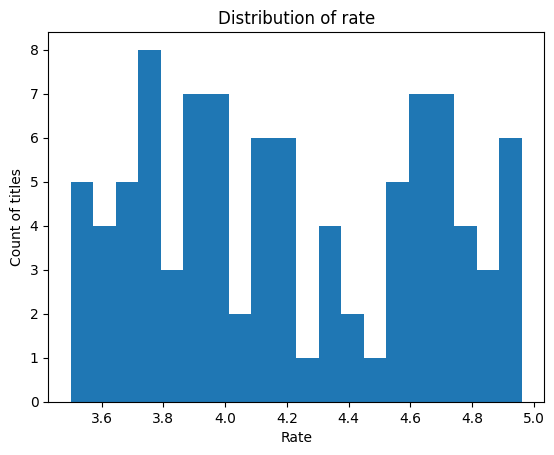

,title,add_to_favorite
13,"Klein Constantia Sauvignon Blanc 2020/21, Cons...",44
22,Olivier Dubois 'Cuvée Prestige' Pinot Noir 202...,27
29,Taittinger Brut Réserve Champagne,25
3,Bread & Butter 'Winemaker's Selection' Caberne...,23
7,"Chosen by Majestic Pinot Noir 2022, France",11
9,Domaine des Patureaux Organic Pouilly-Fumé 202...,10
23,"Oyster Bay Sauvignon Blanc 2022, Marlborough",8
28,"Rustenberg 'RM Nicholson' 2020/21, Stellenbosch",7
21,"Nyetimber 'Classic Cuvée' Brut, Sussex",7
18,Marqués de Cáceres Rioja Gran Reserva 2014/15,6


,title,view_item
14,"Chosen By Majestic Greek White 2022, Peloponnese",133
37,"Klein Constantia Sauvignon Blanc 2020/21, Cons...",67
7,Bread & Butter 'Winemaker's Selection' Chardon...,66
2,Baron de Boutisse Saint-Émilion Grand Cru 2018/19,65
52,Marqués de Riscal Rioja Reserva 2018/19,62
84,"Two Hands 'Tenacity' Old Vine Shiraz 2021/22, ...",61
70,"Rustenberg 'RM Nicholson' 2020/21, Stellenbosch",52
41,"La Marca Extra Dry Prosecco, Conegliano Valdob...",50
74,Taittinger Brut Réserve Champagne,49
11,"Caves d'Esclans 'Whispering Angel' Rosé 2022, ...",48


,country,add_to_favorite
2,France,94
7,South Africa,51
9,USA,36
1,England,13
4,New Zealand,13
8,Spain,11
3,Italy,7
0,Australia,3
6,Scotland,3
5,Portugal,1


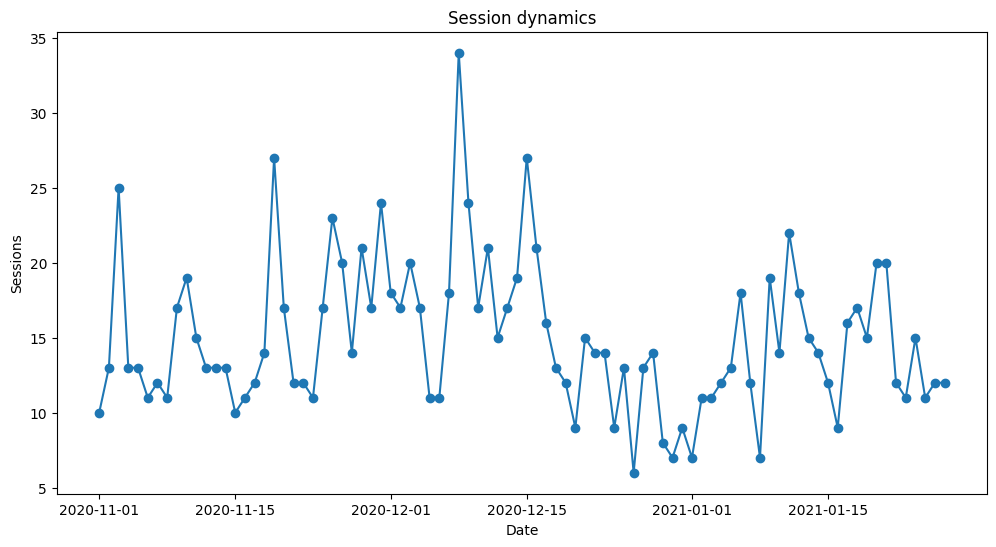

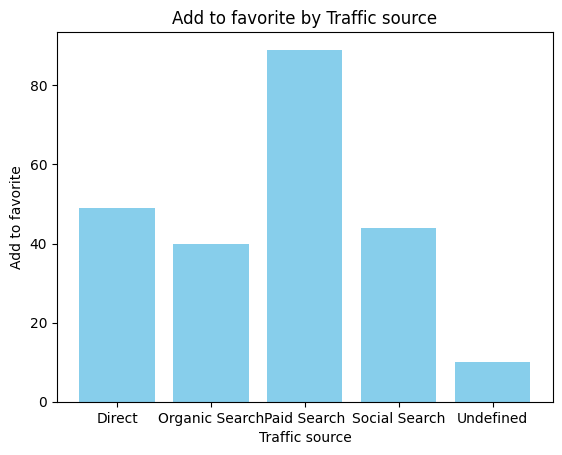

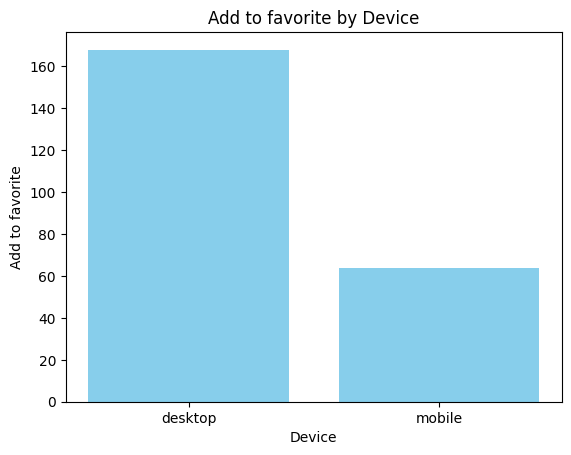

,traffic_source,add_to_favorite,session_id,conversion_%
0,Direct,49,3809,1.286427
1,Organic Search,40,4840,0.826446
2,Paid Search,89,4460,1.995516
3,Social Search,44,962,4.573805
4,Undefined,10,1419,0.704722


,device,add_to_favorite,session_id,conversion_%
0,desktop,168,9803,1.713761
1,mobile,64,5477,1.168523


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Розрахуємо значення конверсії в "додати в обране"
session_cnt = df["session_id"].nunique()
add_to_favorite_session = df[df["event_name"] == "add_to_favorite"]
add_to_favorite_cnt = add_to_favorite_session["session_id"].nunique()

conv_to_favor = add_to_favorite_cnt / session_cnt

print ("Конверсія в 'Додати в обране':" , conv_to_favor*100, "%")

#Розрахуємо значення CTR
view_item_session = df[df["event_name"] == "view_item"]
view_item_cnt = view_item_session["session_id"].nunique()

CTR = view_item_cnt / session_cnt

print ("CTR:" , CTR * 100, "%" )

#Топ вин по оцінках
vine_rate = df.groupby(["title"], as_index=False)["rate"].mean()
sort_vine_rate = vine_rate.sort_values(by="rate" , ascending=False)

#Розподіл кількості найменувань в залежності від rate товару
plt.hist(sort_vine_rate["rate"], bins=20)
plt.title("Distribution of rate")  # Title of the histogram
plt.xlabel("Rate")  # X-axis label
plt.ylabel("Count of titles")  # Y-axis label
plt.show()

#Топ-20 вин по кількості "додати в обране"
add_to_favorite_rate = add_to_favorite_session.groupby(["title"], as_index=False)["event_name"].count()
add_to_favorite_rate = add_to_favorite_rate.rename(columns={"event_name": "add_to_favorite"})
sort_add_to_favorite_rate = add_to_favorite_rate.sort_values(by="add_to_favorite" , ascending=False)
display(sort_add_to_favorite_rate.head(20))

#Топ-20 вин по кількості clicks
view_item_rate = view_item_session.groupby(["title"], as_index=False)["event_name"].count()
view_item_rate = view_item_rate.rename(columns={"event_name": "view_item"})
sort_view_item_rate = view_item_rate.sort_values(by="view_item" , ascending=False)
display(sort_view_item_rate.head(20))

#Топ-20 країн по кількості "додати в обране"
country_rate = add_to_favorite_session.groupby(["country"], as_index=False)["event_name"].count()
country_rate = country_rate.rename(columns={"event_name": "add_to_favorite"})
sort_country_rate= country_rate.sort_values(by="add_to_favorite" , ascending=False)
display(sort_country_rate.head(10))

#Кількість унікальних сесій розподілених за датою
session_by_date = df.groupby(["session_date"], as_index = False)["session_id"].nunique()

plt.figure(figsize=(12, 6))
plt.plot(session_by_date["session_date"], session_by_date["session_id"], marker="o")
plt.title("Session dynamics")  # Title of the graph
plt.xlabel("Date")  # X-axis label
plt.ylabel("Sessions")  # Y-axis label
plt.show()

#Кількість дій "add_to_favorite" в залежності від джерела трафіку
add_to_favorite_by_traffic = add_to_favorite_session.groupby(["traffic_source"], as_index = False)["event_name"].count()
add_to_favorite_by_traffic = add_to_favorite_by_traffic.rename(columns={"event_name": "add_to_favorite"})

plt.bar(add_to_favorite_by_traffic["traffic_source"], add_to_favorite_by_traffic["add_to_favorite"], color="skyblue")
plt.title("Add to favorite by Traffic source")  # Title of the graph
plt.xlabel("Traffic source")  # X-axis label
plt.ylabel("Add to favorite")  # Y-axis label
plt.show()

#Кількість дій "add_to_favorite" в залежності від типу девайсу
add_to_favorite_by_device = add_to_favorite_session.groupby(["device"], as_index = False)["event_name"].count()
add_to_favorite_by_device = add_to_favorite_by_device.rename(columns={"event_name": "add_to_favorite"})

plt.bar(add_to_favorite_by_device["device"], add_to_favorite_by_device["add_to_favorite"], color="skyblue")
plt.title("Add to favorite by Device")  # Title of the graph
plt.xlabel("Device")  # X-axis label
plt.ylabel("Add to favorite")  # Y-axis label
plt.show()

#Конверсія в "додати в обране" за джерелами трафіку
session_cnt_by_traffic = df.groupby(["traffic_source"], as_index = False)["session_id"].count()
inner_join_by_traffic = pd.merge(add_to_favorite_by_traffic, session_cnt_by_traffic, on="traffic_source", how="inner")
inner_join_by_traffic["conversion_%"] = inner_join_by_traffic["add_to_favorite"] / inner_join_by_traffic["session_id"] *100
display(inner_join_by_traffic.head(10))

#Конверсія в "додати в обране" за девайсами
session_cnt_by_device = df.groupby(["device"], as_index = False)["session_id"].count()
inner_join_by_device = pd.merge(add_to_favorite_by_device, session_cnt_by_device, on="device", how="inner")
inner_join_by_device["conversion_%"] = inner_join_by_device["add_to_favorite"] / inner_join_by_device["session_id"] *100
display(inner_join_by_device.head(10))

In [ ]:
from google.colab import files
import pandas as pd

# Зберегти таблицю
df.to_excel("df.xlsx", index=False)

# Завантажити файл
files.download("df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>